In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as plo

import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [4]:
df.shape

(269, 71)

In [5]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [19]:
df.isnull()

1Gender of respondent  2 How old are you?   \
0                    False                False   
1                    False                False   
2                    False                False   
3                    False                False   
4                    False                False   
5                    False                False   
6                    False                False   
7                    False                False   
8                    False                False   
9                    False                False   
10                   False                False   
11                   False                False   
12                   False                False   
13                   False                False   
14                   False                False   
15                   False                False   
16                   False                False   
17                   False                False   
18                   False                False   
19                   False                False   
20                   False                False   
21                   False                False   
22                   False                False   
23                   False                False   
24                   False                False   
25                   False                False   
26                   False                False   
27                   False                False   
28                   False                False   
29                   False                False   
30                   False                False   
31                   False                False   
32                   False                False   
33                   False                False   
34                   False                False   
35                   False                False   
36                   False                False   
37                   False                False   
38                   False                False   
39                   False                False   
40                   False                False   
41                   False                False   
42                   False                False   
43                   False                False   
44                   False                False   
45                   False                False   
46                   False                False   
47                   False                False   
48                   False                False   
49                   False                False   
50                   False                False   
51                   False                False   
52                   False                False   
53                   False                False   
54                   False                False   
55                   False                False   
56                   False                False   
57                   False                False   
58                   False                False   
59                   False                False   
60                   False                False   
61                   False                False   
62                   False                False   
63                   False                False   
64                   False                False   
65                   False                False   
66                   False                False   
67                   False                False   
68                   False                False   
69                   False                False   
70                   False                False   
71                   False                False   
72                   False                False   
73                   False                False   
74                   False                False   
75                   False                False   
76                   False                False   
77                   False 

In [35]:
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

In [34]:
df.shape

(269, 71)

In [28]:
df['Quickness to complete purchase'].unique()

array(['Paytm.com', 'Amazon.com, Flipkart.com, Myntra.com',
       'Amazon.com, Paytm.com, Myntra.com',
       'Amazon.com, Flipkart.com, Paytm.com',
       'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal',
       'Amazon.com', 'Flipkart.com, Myntra.com, Snapdeal',
       'Amazon.com, Flipkart.com', 'Flipkart.com'], dtype=object)

In [33]:
df.values

array([['Male', '31-40 years', 'Delhi', ..., 'Amazon.in', 'Amazon.in',
        'Flipkart.com'],
       ['Female', '21-30 years', 'Delhi', ..., 'Myntra.com',
        'Amazon.in, Flipkart.com', 'Amazon.in, Myntra.com'],
       ['Female', '21-30 years', 'Greater Noida', ..., 'Paytm.com',
        'Amazon.in', 'Amazon.in, Paytm.com, Myntra.com'],
       ...,
       ['Female', '41-50 yaers', 'Bangalore ', ..., 'Snapdeal.com',
        'Amazon.in', 'Amazon.in'],
       ['Female', 'Less than 20 years', 'Solan', ...,
        'Myntra.com, Snapdeal.com', 'Myntra.com, Snapdeal.com',
        'Amazon.in'],
       ['Female', '41-50 yaers', 'Ghaziabad', ..., 'Amazon.in',
        'Amazon.in', 'Amazon.in']], dtype=object)

In [36]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72      True
73     False
74     False
75     False
76     False

In [39]:
dupli=df.duplicated()
df[dupli]

1Gender of respondent 2 How old are you?   \
72                   Male         21-30 years   
94                 Female         21-30 years   
95                 Female         21-30 years   
97                 Female  Less than 20 years   
99                 Female         41-50 yaers   
100                Female  51 years and above   
101                Female         31-40 years   
108                  Male         21-30 years   
109                  Male         41-50 yaers   
110                  Male         41-50 yaers   
111                  Male         31-40 years   
113                  Male         31-40 years   
114                Female         21-30 years   
115                Female         21-30 years   
117                Female         31-40 years   
118                Female  Less than 20 years   
119                Female         31-40 years   
120                Female         41-50 yaers   
121                Female  51 years and above   
122                Female         31-40 years   
123                Female         31-40 years   
124                Female         21-30 years   
125                Female  51 years and above   
126                Female         41-50 yaers   
127                Female         31-40 years   
128                Female  Less than 20 years   
129                  Male         21-30 years   
130                  Male         41-50 yaers   
131                  Male         41-50 yaers   
132                  Male         31-40 years   
133                  Male         31-40 years   
134                  Male         31-40 years   
135                Female  Less than 20 years   
136                Female         31-40 years   
137                  Male         31-40 years   
138                Female         21-30 years   
139                  Male         21-30 years   
140                  Male         41-50 yaers   
141                Female         41-50 yaers   
142                Female         21-30 years   
143                  Male         41-50 yaers   
144                Female         31-40 years   
145                Female         21-30 years   
146                Female  51 years and above   
147                Female         31-40 years   
148                Female         31-40 years   
149                Female         41-50 yaers   
150                Female         21-30 years   
151                Female         31-40 years   
152                Female  51 years and above   
153                Female         31-40 years   
154                Female         41-50 yaers   
155                Female  51 years and above   
156                Female         41-50 yaers   
157                Female  51 years and above   
158                Female         21-30 years   
159                Female         31-40 years   
160                Female         31-40 years   
161                Female         21-30 years   
162                Female         21-30 years   
163                Female         31-40 years   
164                Female         31-40 years   
165                Female         41-50 yaers   
166                Female         21-30 years   
167                Female         31-40 years   
168                Female         21-30 years   
169                Female         21-30 years   
170                Female         21-30 years   
171                Female         41-50 yaers   
172                Female         41-50 yaers   
173                Female         21-30 years   
174                Female         31-40 years   
175                Female  Less than 20 years   
176                Female         41-50 yaers   
177                Female         31-40 years   
178                Female         41-50 yaers   
179                Female         21-30 years   
180                Female  Less than 20 years   
181                Female         31-40 years   
182                Female         21-30 years   
183                Female         4

In [43]:
categorical_col,numeric_col=[],[]
for i in df:
    if df[i].dtype=='O':
        categorical_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        numeric_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(categorical_col))
print('>>> Number of Numerical Feature::', len(numeric_col))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


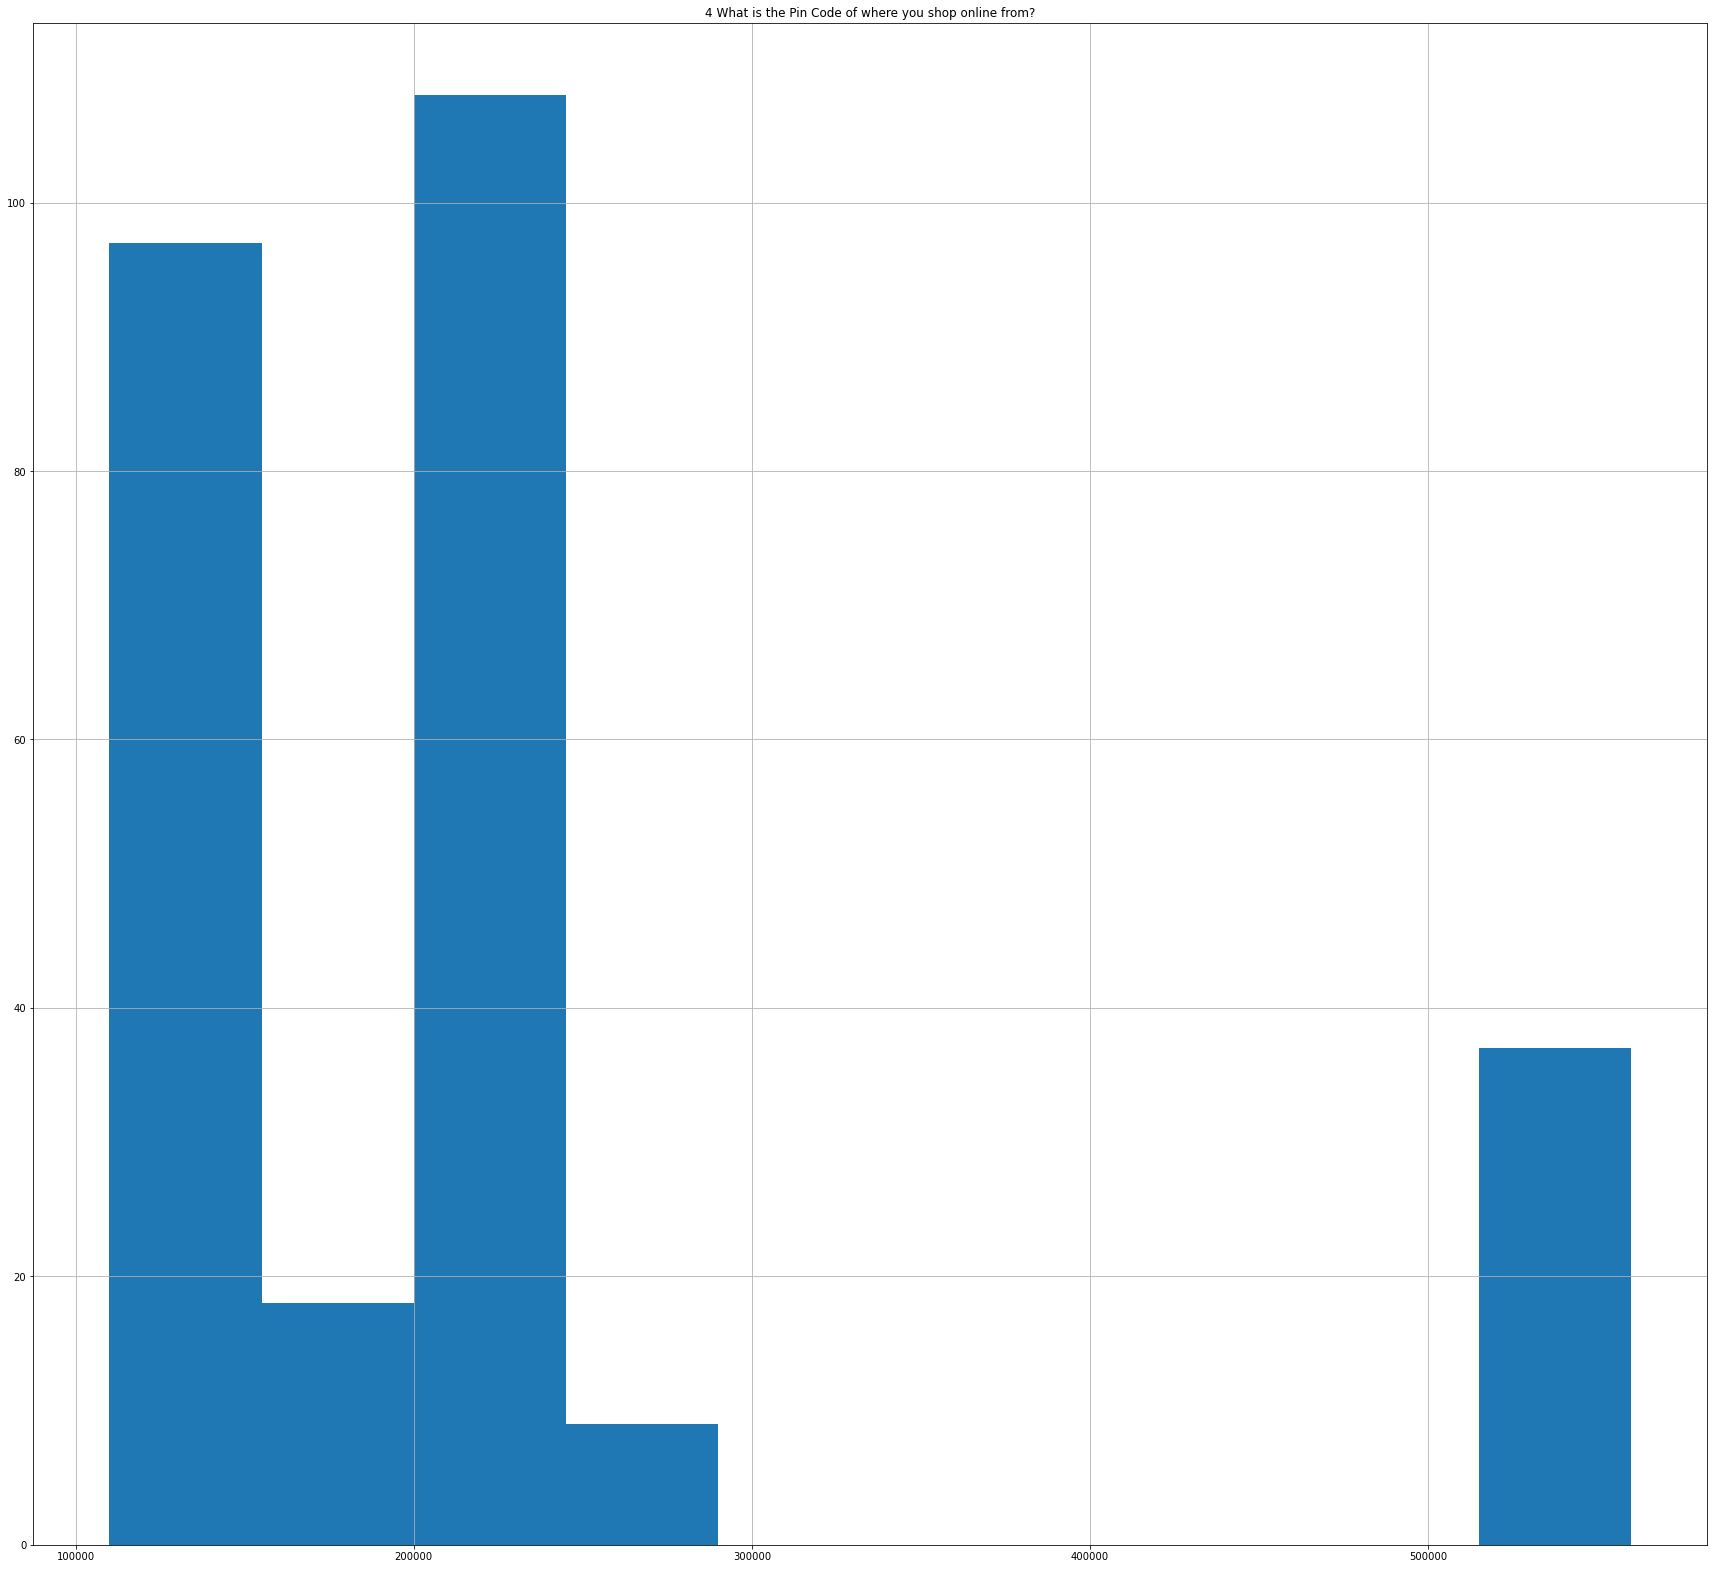

In [7]:
df.hist(figsize=(30,28));

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

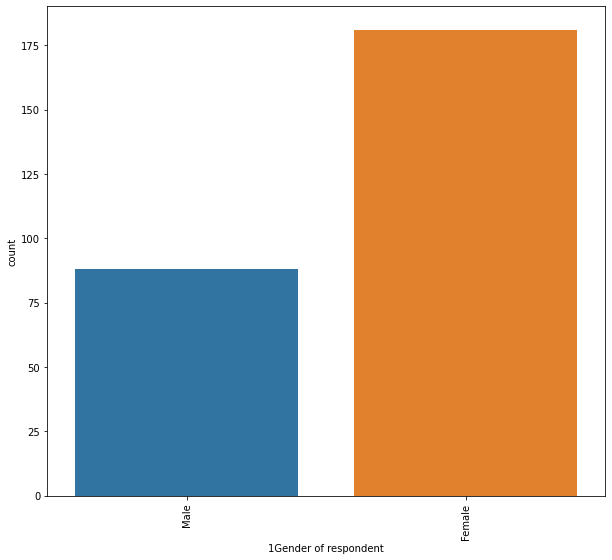

In [8]:
plt.figure(figsize=(10,9))
sns.countplot(df['1Gender of respondent'])
plt.xticks(rotation=90)

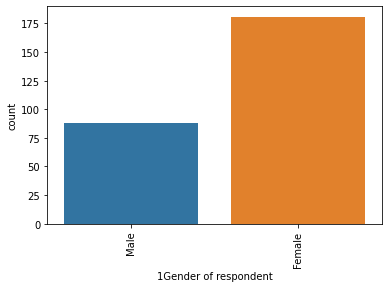

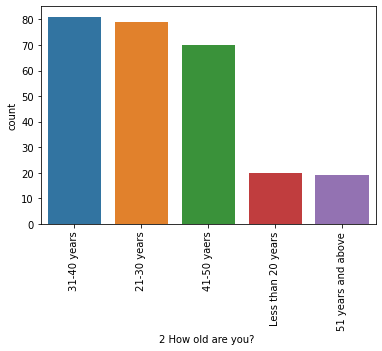

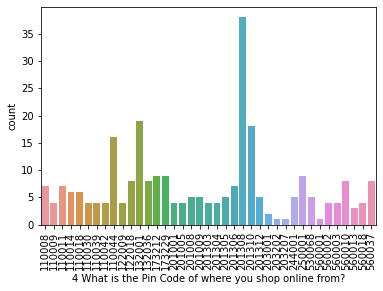

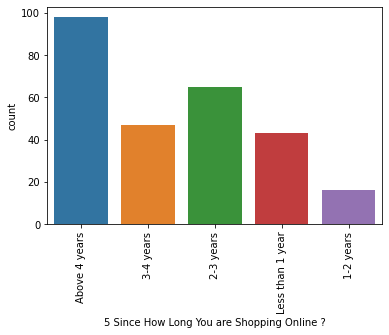

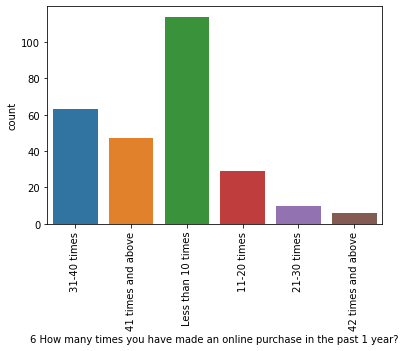

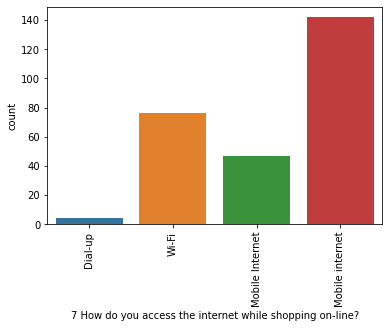

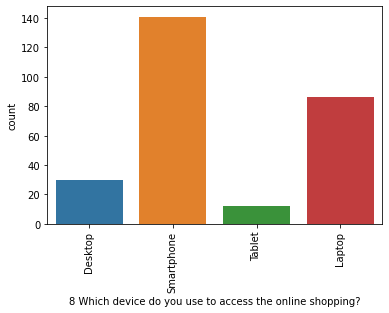

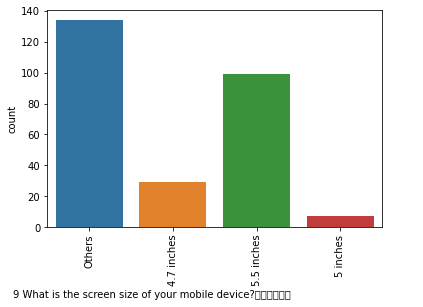

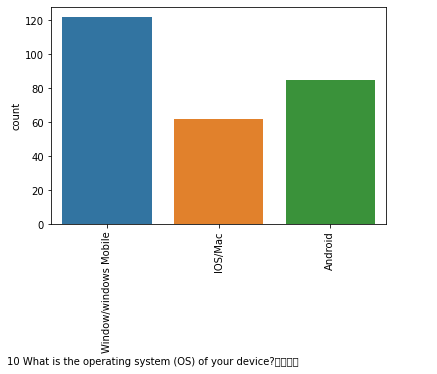

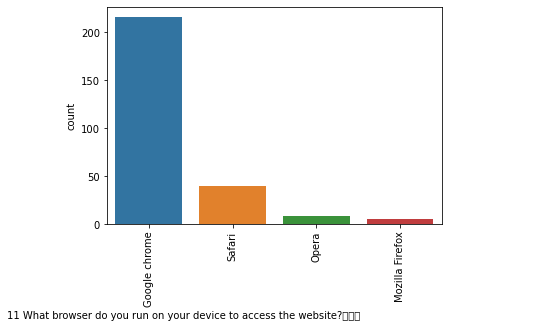

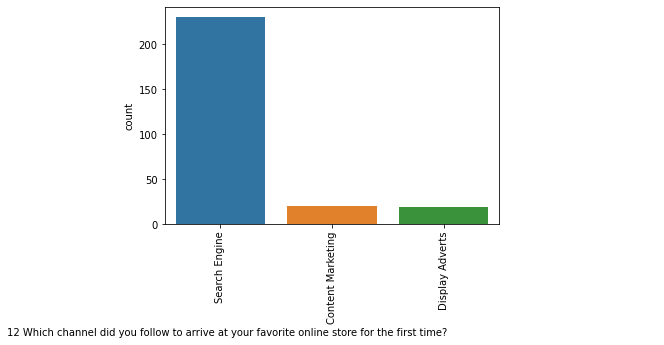

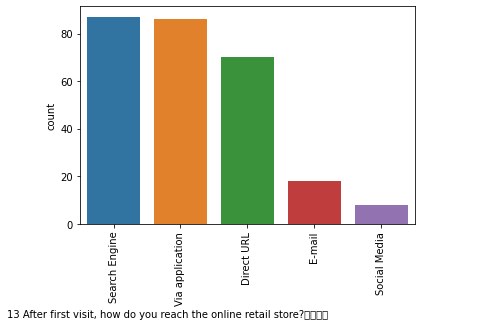

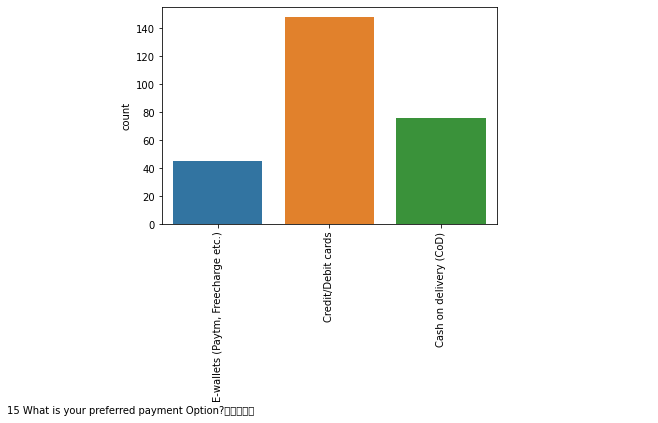

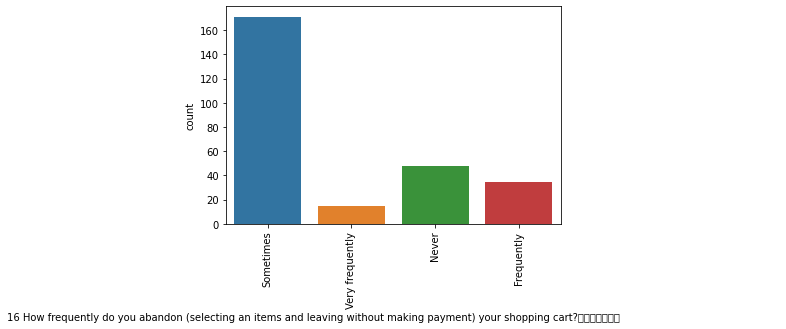

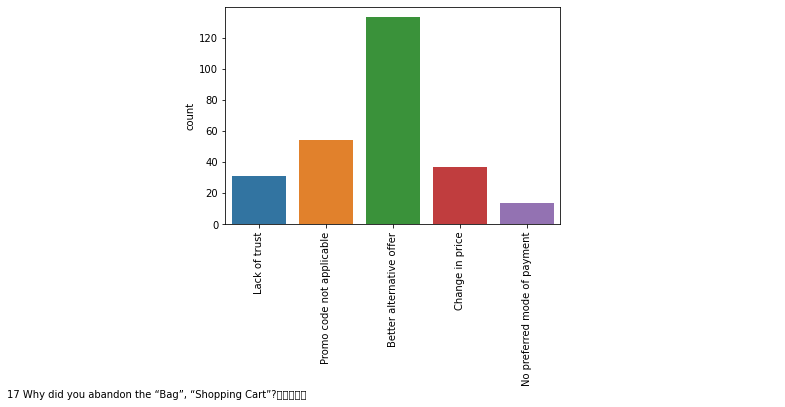

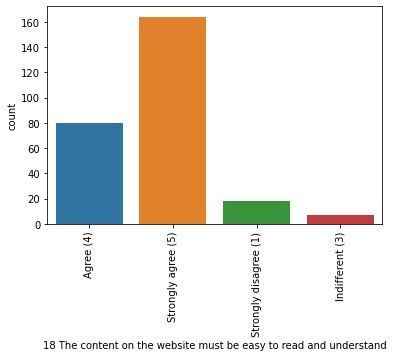

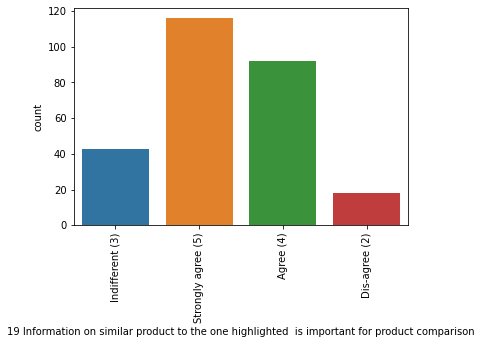

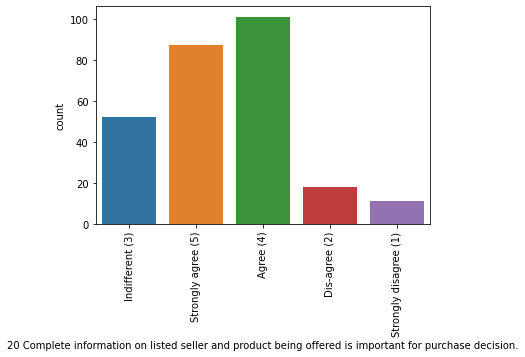

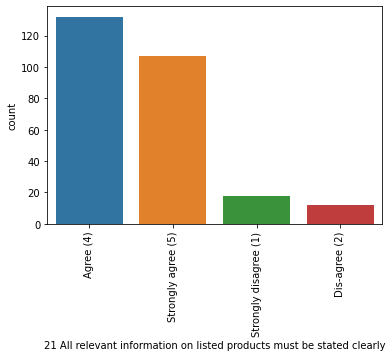

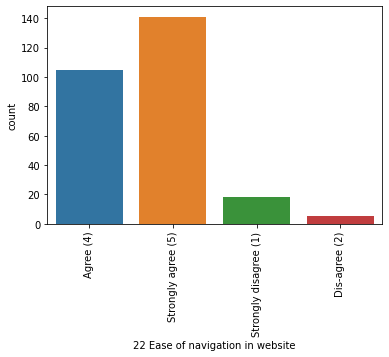

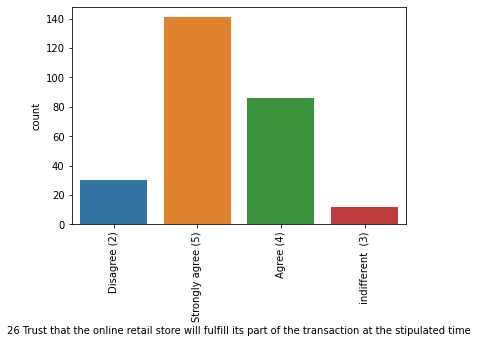

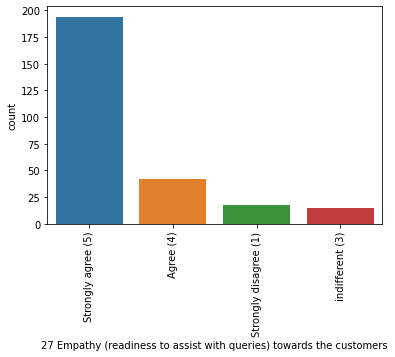

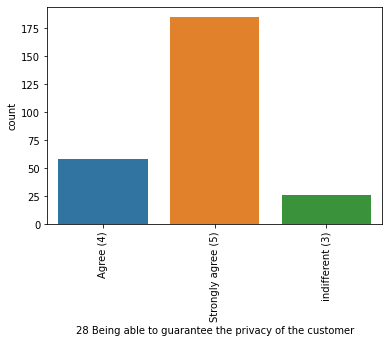

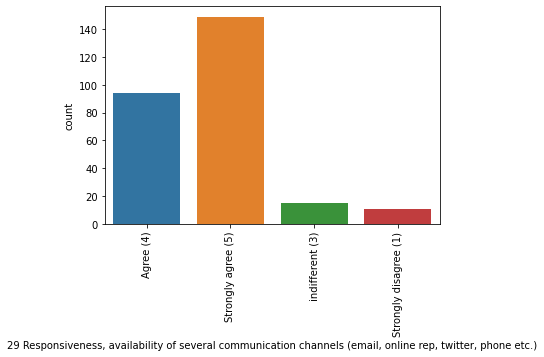

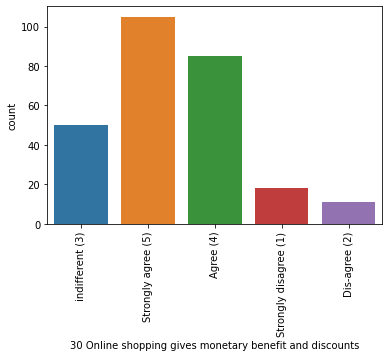

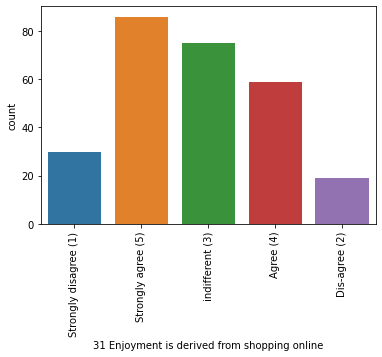

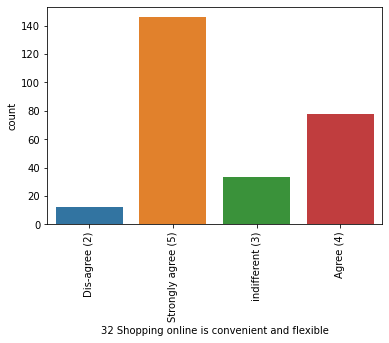

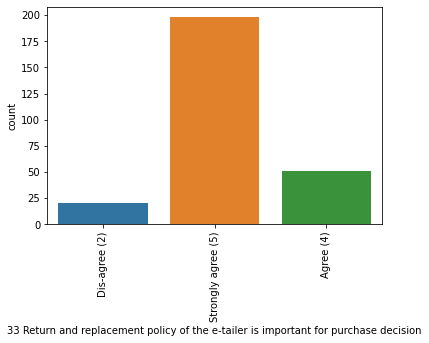

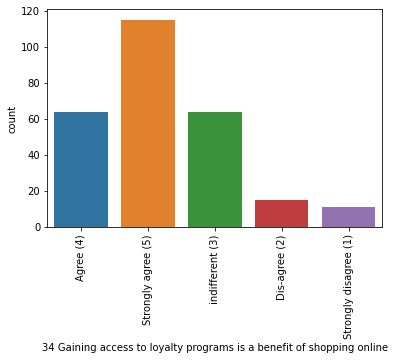

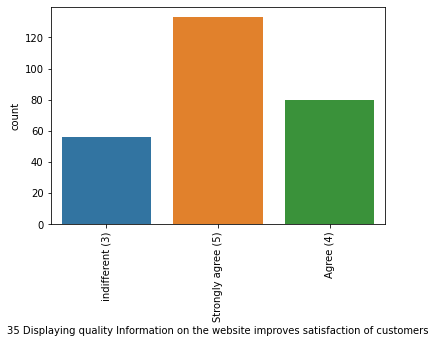

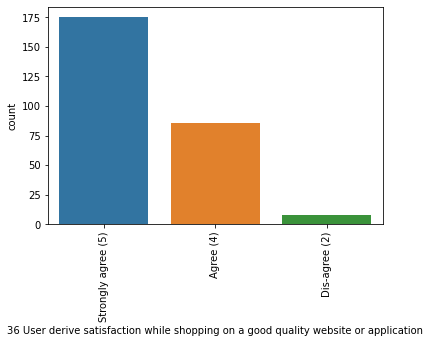

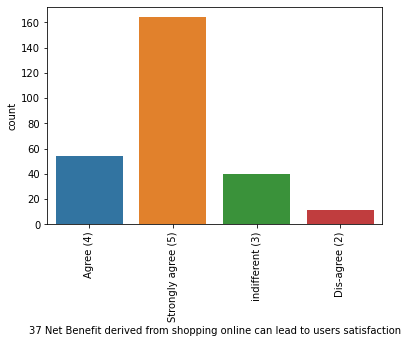

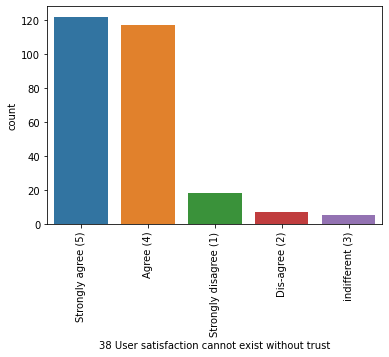

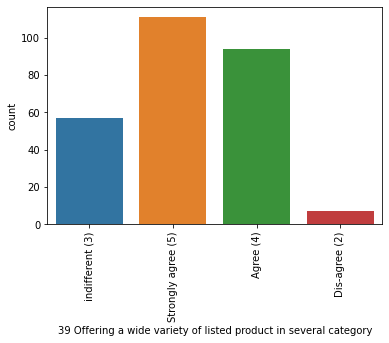

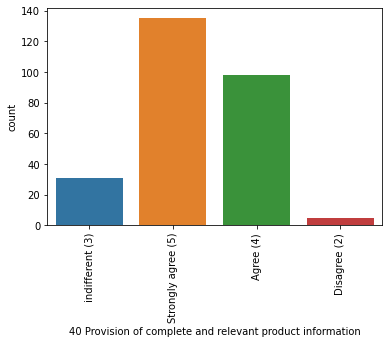

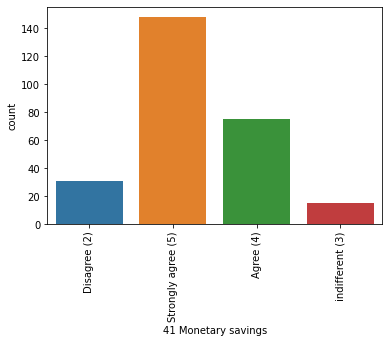

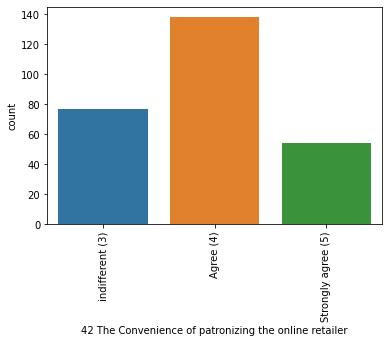

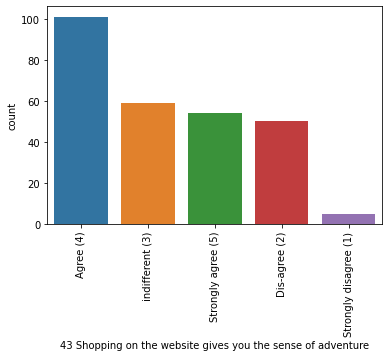

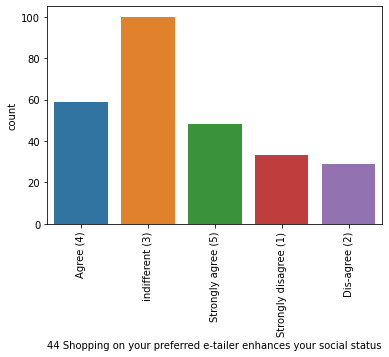

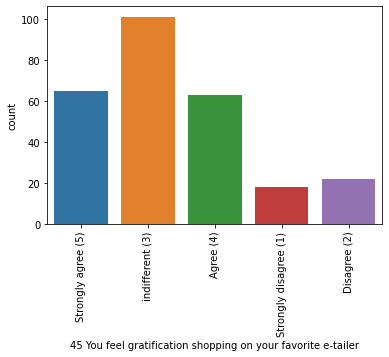

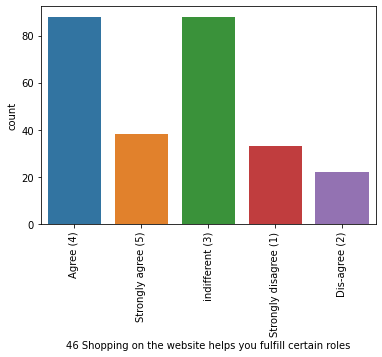

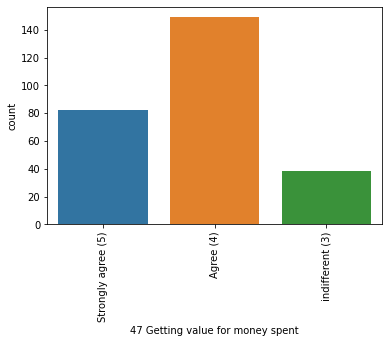

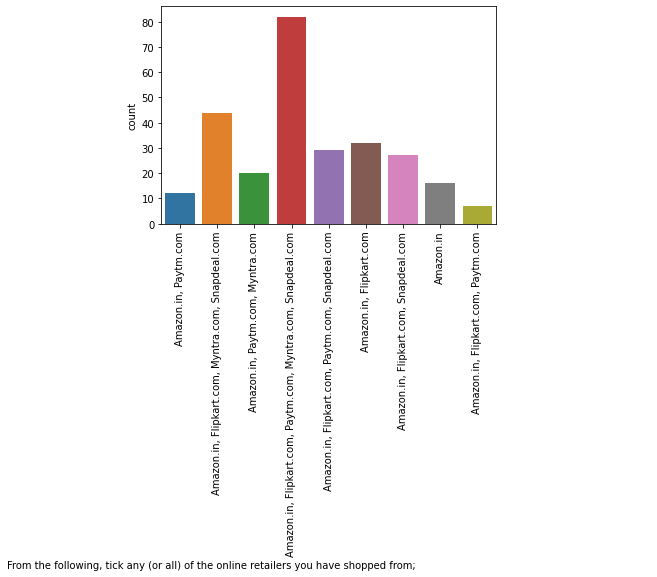

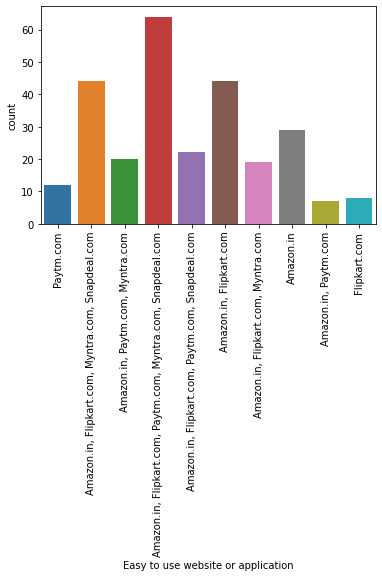

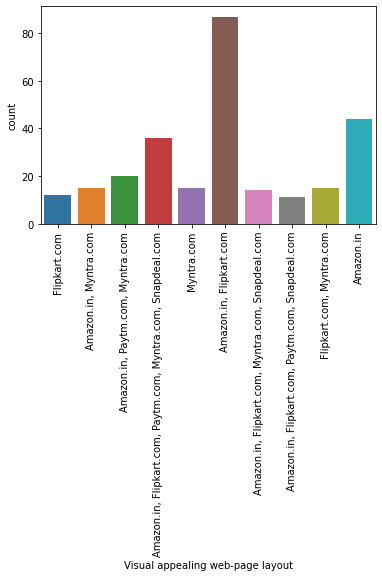

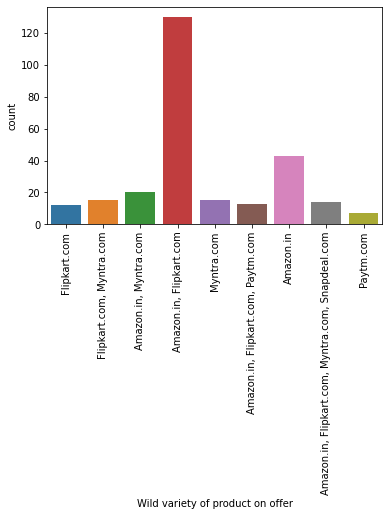

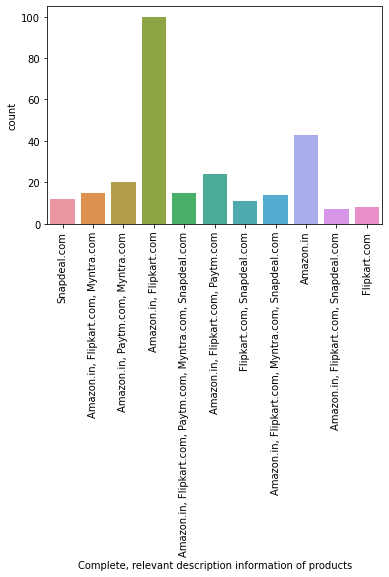

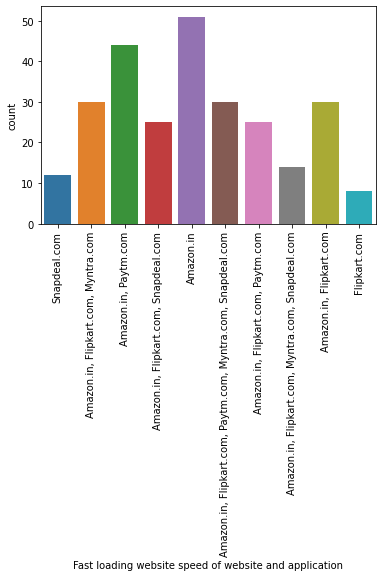

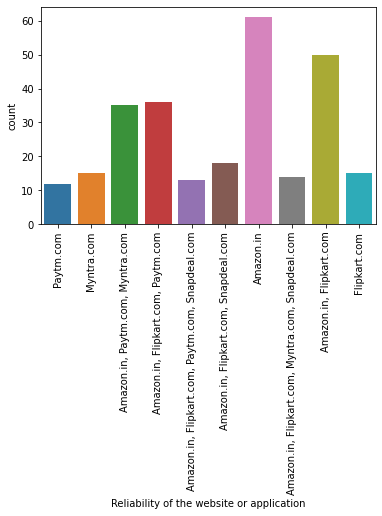

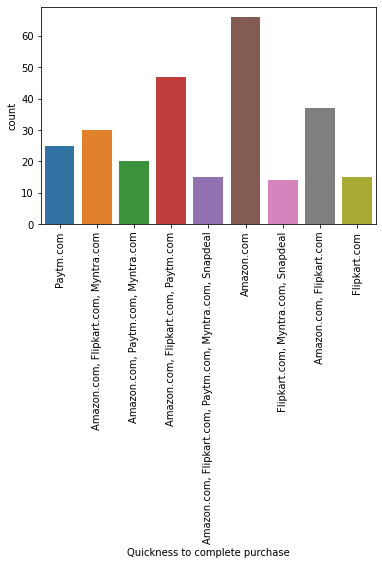

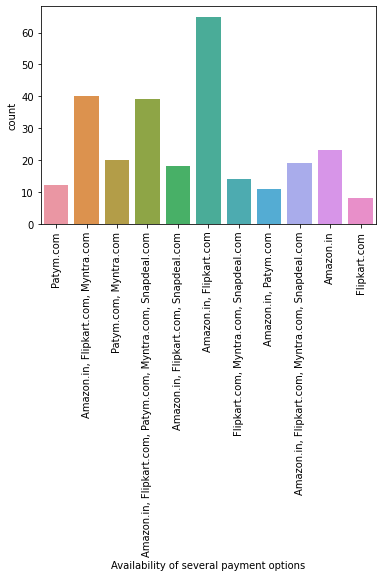

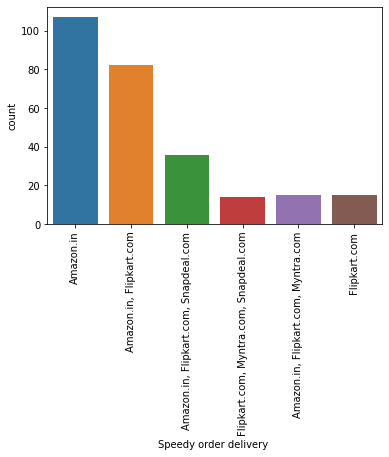

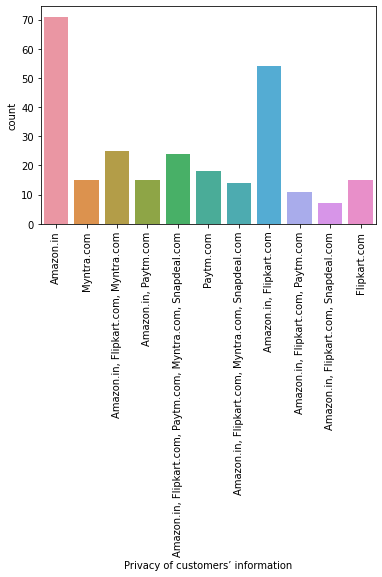

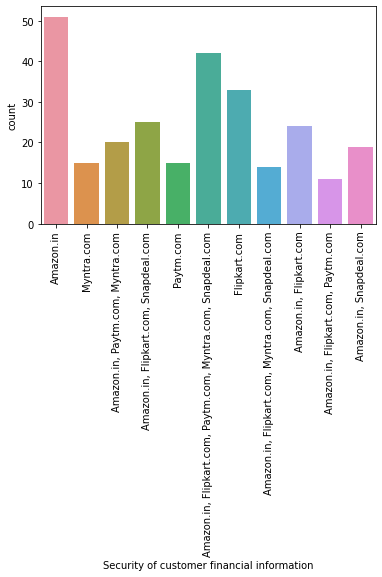

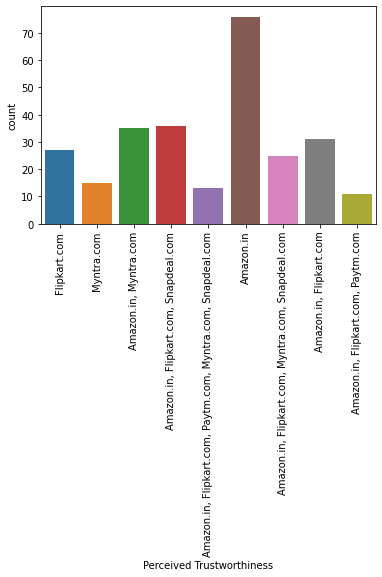

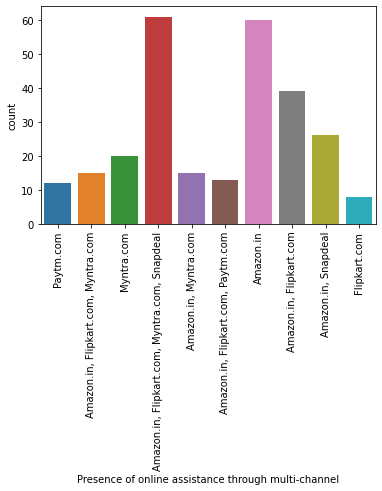

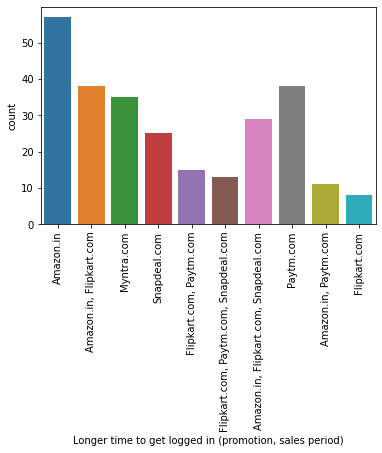

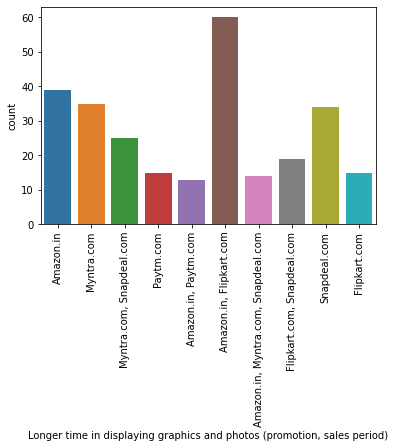

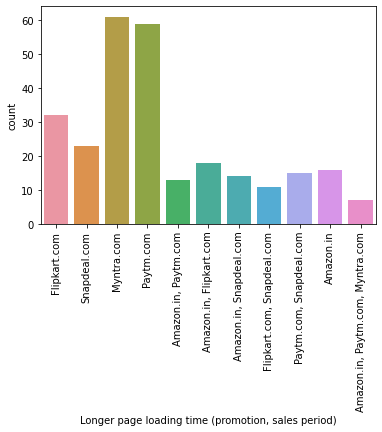

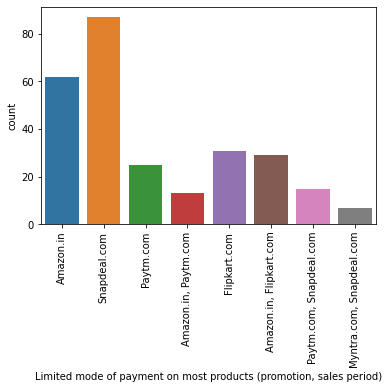

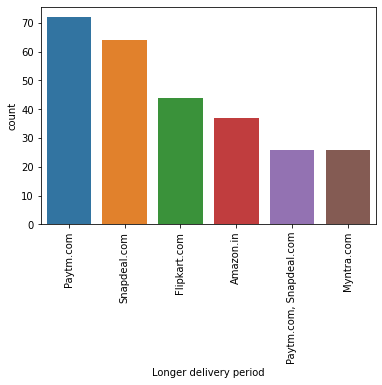

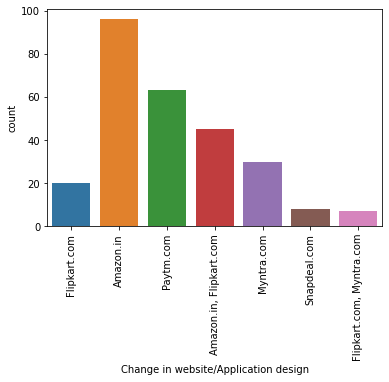

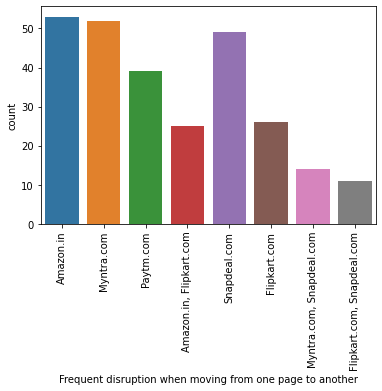

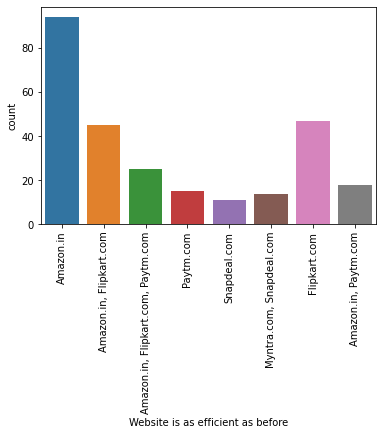

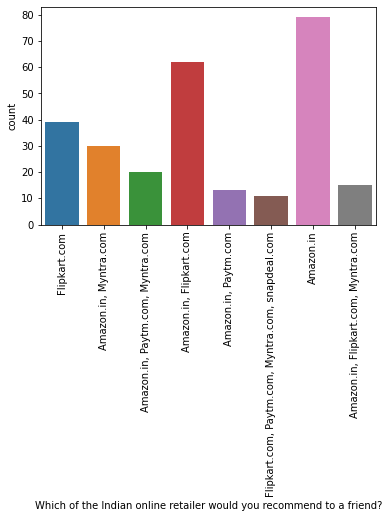

In [9]:
for i in df.columns:
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [10]:
df['1Gender of respondent'].value_counts().sort_index()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [11]:
df['25 Convenient Payment methods'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64

In [12]:
df['25 Convenient Payment methods'].iplot(kind='hist', xTitle='Convinient Scale',
                  yTitle='Total Count ', title='Convenient Payment methods')

In [13]:
df['6 How many times you have made an online purchase in the past 1 year?'].iplot(kind='hist', xTitle='Purchase',
                  yTitle='Total Purchase ', title='an online purchase in the past 1 year')

In [14]:
plt.figure(figsize=(10,9))
sns.countplot(x=df['47 Getting value for money spent'],hue=df['1Gender of respondent'],data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'indifferent (3)')])

In [15]:

fig = px.scatter_3d(df, x='1Gender of respondent', 
                    y='3 Which city do you shop online from?', 
                    z='8 Which device do you use to access the online shopping?',
                    color='1Gender of respondent')
fig.show()

In [48]:
for i in df.columns:
    fig = px.scatter_3d(df, x='1Gender of respondent', 
                    y='Which of the Indian online retailer would you recommend to a friend?', 
                    z='8 Which device do you use to access the online shopping?',
                    color='Which of the Indian online retailer would you recommend to a friend?')
fig.show()

In [47]:
for i in df.columns:
    fig = px.scatter_3d(df, x='1Gender of respondent', 
                    y='Longer delivery period', 
                    z='Longer page loading time (promotion, sales period)',
                    color='Longer delivery period')
fig.show()

In [49]:
for i in df.columns:
    fig = px.scatter_3d(df, x='1Gender of respondent', 
                    y='Security of customer financial information', 
                    z='Perceived Trustworthiness',
                    color='Perceived Trustworthiness')
fig.show()